## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

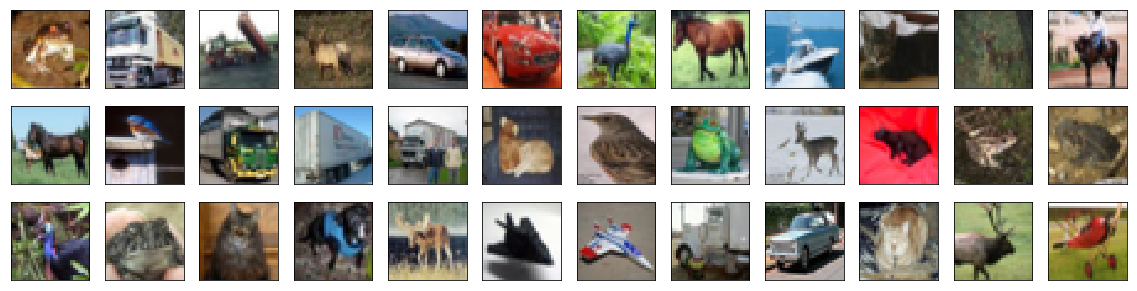

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

W0801 19:30:48.388385  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 19:30:48.432789  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 19:30:48.441494  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 19:30:48.512118  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 19:30:48.569190  6040 deprecation_wrapper.py:119] From C:\Users\naman\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

W0801 19:30:48.704679  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 19:30:48.737410  6040 deprecation_wrapper.py:119] From C:\Users\naman\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

W0801 19:30:48.978838  6040 deprecation.py:323] From C:\Users\naman\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 21s - loss: 1.5909 - acc: 0.4219 - val_loss: 1.3479 - val_acc: 0.5250

Epoch 00001: val_loss improved from inf to 1.34785, saving model to model.weights.best.hdf5
Epoch 2/100
 - 18s - loss: 1.2937 - acc: 0.5356 - val_loss: 1.2624 - val_acc: 0.5696

Epoch 00002: val_loss improved from 1.34785 to 1.26242, saving model to model.weights.best.hdf5
Epoch 3/100
 - 14s - loss: 1.1775 - acc: 0.5832 - val_loss: 1.0759 - val_acc: 0.6238

Epoch 00003: val_loss improved from 1.26242 to 1.07593, saving model to model.weights.best.hdf5
Epoch 4/100
 - 16s - loss: 1.1099 - acc: 0.6083 - val_loss: 1.0209 - val_acc: 0.6540

Epoch 00004: val_loss improved from 1.07593 to 1.02089, saving model to model.weights.best.hdf5
Epoch 5/100
 - 19s - loss: 1.0624 - acc: 0.6268 - val_loss: 1.0778 - val_acc: 0.6356

Epoch 00005: val_loss did not improve from 1.02089
Epoch 6/100
 - 15s - loss: 1.0345 - acc: 0.6404 - val_loss: 0.9941 - val_acc: 0.6642

Epoc


Epoch 00058: val_loss did not improve from 0.96454
Epoch 59/100
 - 11s - loss: 1.5873 - acc: 0.4638 - val_loss: 1.3268 - val_acc: 0.5398

Epoch 00059: val_loss did not improve from 0.96454
Epoch 60/100
 - 10s - loss: 1.5892 - acc: 0.4638 - val_loss: 1.6052 - val_acc: 0.4606

Epoch 00060: val_loss did not improve from 0.96454
Epoch 61/100
 - 10s - loss: 1.6288 - acc: 0.4550 - val_loss: 1.5364 - val_acc: 0.4526

Epoch 00061: val_loss did not improve from 0.96454
Epoch 62/100
 - 10s - loss: 1.6176 - acc: 0.4548 - val_loss: 1.3293 - val_acc: 0.5400

Epoch 00062: val_loss did not improve from 0.96454
Epoch 63/100
 - 10s - loss: 1.6303 - acc: 0.4500 - val_loss: 1.4009 - val_acc: 0.5194

Epoch 00063: val_loss did not improve from 0.96454
Epoch 64/100
 - 11s - loss: 1.6353 - acc: 0.4481 - val_loss: 1.5540 - val_acc: 0.4550

Epoch 00064: val_loss did not improve from 0.96454
Epoch 65/100
 - 10s - loss: 1.6638 - acc: 0.4418 - val_loss: 4.6964 - val_acc: 0.2268

Epoch 00065: val_loss did not imp

### 8. Load the Model with the Best Validation Accuracy

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6601


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

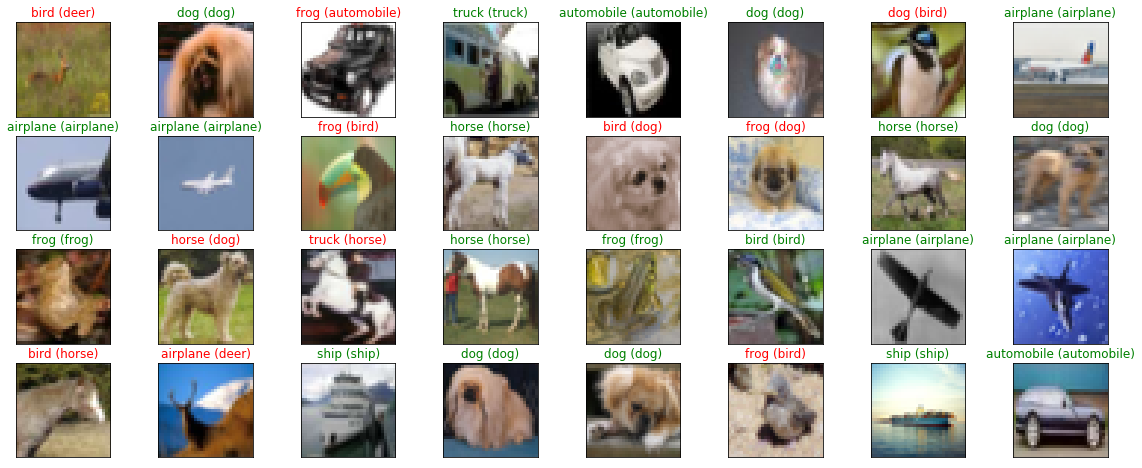

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### 11. Conclusion

The accuracy on the given dataset may not be much but we can increase its accuracy by using more complex networks but they would take hours to days to trained.you can can such examples [here](http://blog.kaggle.com/2015/01/02/cifar-10-competition-winners-interviews-with-dr-ben-graham-phil-culliton-zygmunt-zajac/)
